In [1]:
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
#import csv and display first 5 rows
survivors = pd.read_csv('train.csv')
print(survivors.shape)
survivors.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Use describe() to get a quick glance at the structure of the data. 
#NOTE: Columns with text values are omitted
survivors.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lulic, Mr. Nikola",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print("# Missing Age: ",survivors["Age"].isna().sum())

# Missing Age:  177


In [5]:
#Alter the data to be more ML friendly

#Turn Text data into categorical data. Ie. "Male" becomes 1 and "Female" becomes 2.  
survivors["Sex"]=survivors["Sex"].astype("category").cat.codes
survivors["Embarked"]=survivors["Embarked"].astype("category").cat.codes
# survivors["Embarked"]=survivors["Embarked"].astype("category").cat.codes

#ML cannot handle Null values or Na values. 
#This fills any NaN in Column "Age" with the average age. 
#Idk if this is appropriate but I read somewhere it's ok.  
#The purpose is to get as much data as possible. 
survivors["Age"]=survivors["Age"].fillna(29.699118)

#THis is a list of bins for "Age". ML does better with discrete data rather than continuou. 
#This turns ages into age brackets
ageBins= (0,5,10,15,20,25,30,35,40,45,50,55,60,65, 70, 75,80,85)
ageBins2= (0,16,55,85) 
ageBins3=(0,10,20,30,40,50,60,70,80,90)
survivors['Age'] = pd.cut(survivors['Age'], bins=ageBins2, labels=False)

fareBins= [0,50,100,150,200,250,300,350,400,450,500,550,600, 650,700,750,800,850,900]
fareBins2= [0,100,200,300,400,500,600,700,800,900]
fareBins3= [0,100,500,900]
survivors['Fare'] = pd.cut(survivors['Fare'], bins=fareBins3, labels=False)


In [6]:
#This step drops unused columns from the dataframe
survivors.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [7]:
#checks the number of NaN's in column age. There should be 0 since they were filled with 29.xxx.
survivors["Age"].isna().sum()

0

In [17]:
survivors.head()
# survivors.Fare.unique()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,3,1,0,0.0,2
1,2,1,1,0,4,1,0,0.0,0
2,3,1,3,0,3,0,0,0.0,2
3,4,1,1,0,4,1,0,0.0,2
4,5,0,3,1,4,0,0,0.0,2


In [9]:
# Assign the data to X and y

#Drop any remaining Na values. ML cannot handle them. 
survivors.dropna(inplace=True)
#Assign X and y values
#X is our input and y is our output
X = survivors[["Pclass","Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = survivors["Survived"].values.reshape(-1, 1)

#X and y must have same 1st dimension (891)
print(X.shape, y.shape)

(876, 7) (876, 1)


In [10]:
#split the data into training and testing sets
#random state allows us to randomly select data but be able to reuse that same random data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

657
657
219
219


In [11]:
#reshape data as needed
X_train= X_train.values
y_train= np.stack(y_train, axis=1)
y_train = np.ravel(y_train)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\warne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [14]:
len(X_train_scaled)

657

In [15]:
print(len(y_train))

657


k: 1, Train/Test Score: 0.884/0.772
k: 3, Train/Test Score: 0.852/0.808
k: 5, Train/Test Score: 0.845/0.799
k: 7, Train/Test Score: 0.833/0.804
k: 9, Train/Test Score: 0.820/0.795
k: 11, Train/Test Score: 0.817/0.795
k: 13, Train/Test Score: 0.813/0.790
k: 15, Train/Test Score: 0.817/0.817
k: 17, Train/Test Score: 0.820/0.808
k: 19, Train/Test Score: 0.822/0.822
k: 21, Train/Test Score: 0.810/0.817
k: 23, Train/Test Score: 0.804/0.813
k: 25, Train/Test Score: 0.804/0.817
k: 27, Train/Test Score: 0.799/0.822
k: 29, Train/Test Score: 0.790/0.795
k: 31, Train/Test Score: 0.793/0.804
k: 33, Train/Test Score: 0.782/0.795
k: 35, Train/Test Score: 0.791/0.790
k: 37, Train/Test Score: 0.787/0.795
k: 39, Train/Test Score: 0.793/0.804
k: 41, Train/Test Score: 0.791/0.795
k: 43, Train/Test Score: 0.784/0.799
k: 45, Train/Test Score: 0.785/0.799
k: 47, Train/Test Score: 0.782/0.804
k: 49, Train/Test Score: 0.779/0.804


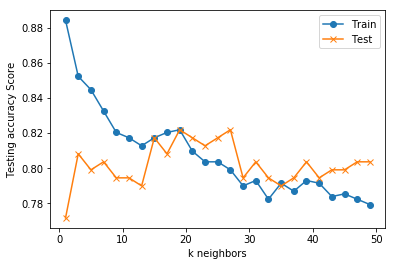

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o',)
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(labels=["Train","Test"])
plt.show()
